In [ ]:
import numpy as np
import librosa
import os
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')
import IPython.display as ipd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir("drive/MyDrive/Colab Notebooks/")

FileNotFoundError: ignored

In [ ]:
data1, sr1 = librosa.load("sound_and_vision_halved.mp3")
#data2, sr2 = librosa.load("sound_and_vision300hz_point6amp_halfsecond.mp3")
#data3, sr3 = librosa.load("SandVHZ300_Apointfour_S4.mp3")
#data4, sr4 = librosa.load("sound_and_vision_halved_threetones.mp3")
data5, sr5 = librosa.load("sound_and_vision_halved_sine2.mp3")

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


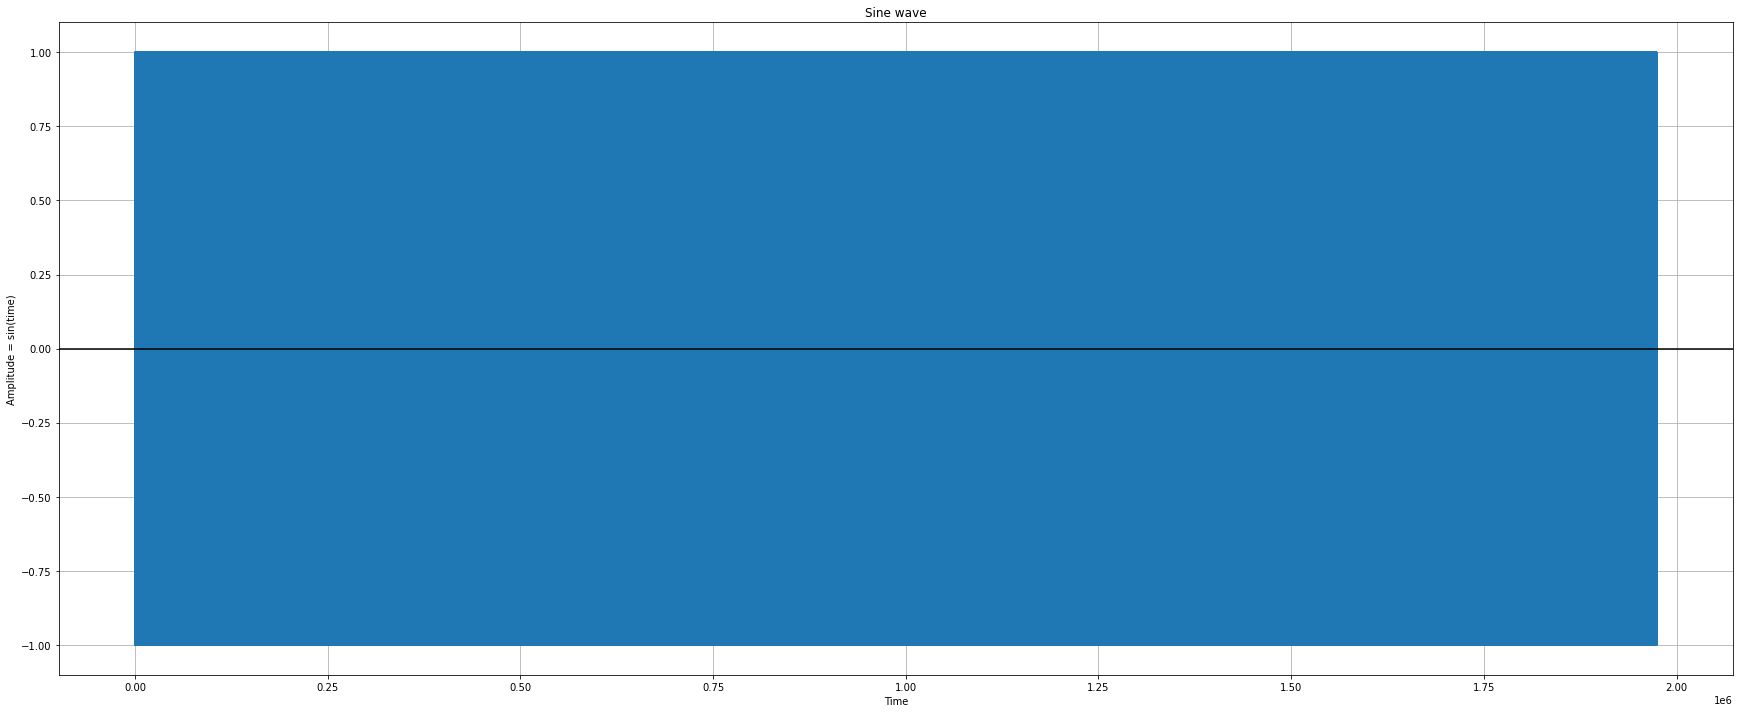

In [ ]:


time = np.arange(len(data1));

# Amplitude of the sine wave is sine of a variable like time

amplitude   = np.sin(time)

# Plot a sine wave using time and amplitude obtained for the sine wave

plt.plot(time, amplitude)

# Give a title for the sine wave plot

plt.title('Sine wave')

 

# Give x axis label for the sine wave plot

plt.xlabel('Time')

 

# Give y axis label for the sine wave plot

plt.ylabel('Amplitude = sin(time)')

 

plt.grid(True, which='both')

 

plt.axhline(y=0, color='k')

 

plt.show()

 

# Display the sine wave

plt.show()

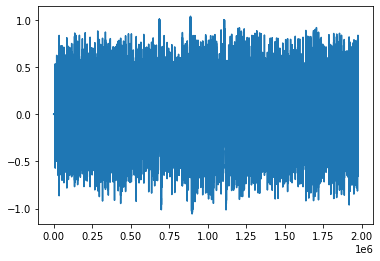

In [ ]:
plt.plot(data5)

In [ ]:
#normal music
dt=1
t1=np.arange(0,len(data1),dt)
#t2=np.arange(0,len(data4),dt)
#t3=np.arange(0,len(data3),dt)



In [ ]:
#transformed music
def transform_and_plot(dt,data):
  #incriment of x axis, try 0.001, 0.1 or 1
  n=len(data)
  fhat=np.fft.fft(data,n)
  PSD = fhat+np.conj(fhat)/n
  freq=(1/(dt*n)) *np.arange(n)
  L=np.arange(1,np.floor(n/2),dtype="int")

  fig,axs = plt.subplots(2,1)

  plt.sca(axs[0])
  plt.plot(data)
  #plt.xlim(data[0],data[-1])


  plt.sca(axs[1])
  plt.plot(freq[L], abs(PSD[L]))
  return(max(abs(PSD[L])))
  #plt.xlim(freq[L[0]],freq[L[-1]])

In [ ]:
#transformed music
def getmax(dt,data):
  #incriment of x axis, try 0.001, 0.1 or 1
  n=len(data)
  fhat=np.fft.fft(data,n)
  PSD = fhat+np.conj(fhat)/n
  freq=(1/(dt*n)) *np.arange(n)
  L=np.arange(1,np.floor(n/2),dtype="int")

  #plt.xlim(data[0],data[-1])

  return(max(abs(PSD[L])))
  #plt.xlim(freq[L[0]],freq[L[-1]])

In [ ]:
#transformed music comparison
def transform_and_compare(dt,data, datazero):
  plt.rcParams['figure.figsize'] = [30,12]

  #Whole data plot
  #incriment of x axis, try 0.001, 0.1 or 1

  t=np.arange(0,len(data),dt)
  n=len(data)
  fhat=np.fft.fft(data,n)
  PSD = fhat+np.conj(fhat)/n
  freq=(1/(dt*n)) *np.arange(n)
  L=np.arange(1,np.floor(n/2),dtype="int")

  fig,axs = plt.subplots(3,1)

  plt.sca(axs[0])
  plt.plot(data)
  #plt.xlim(data[0],data[-1])

  #fourier transform
  plt.sca(axs[1])
  plt.plot(freq[L], abs(PSD[L]))
  #plt.xlim(freq[L[0]],freq[L[-1]])


  

  #square wave only
  plt.sca(axs[2])
  maxvalue = getmax(dt,datazero)
  indices = abs(PSD) > maxvalue
  PSDClean=PSD * indices
  fhat=indices * fhat
  ffit = np.fft.ifft(fhat) #This is the inverse fourier tranform I think
  plt.plot(t,ffit)

  isolated_zip = zip(t,ffit)


  zipped_list = list(isolated_zip)
  #return(zipped_list)
  return(ffit,max(ffit))
  plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


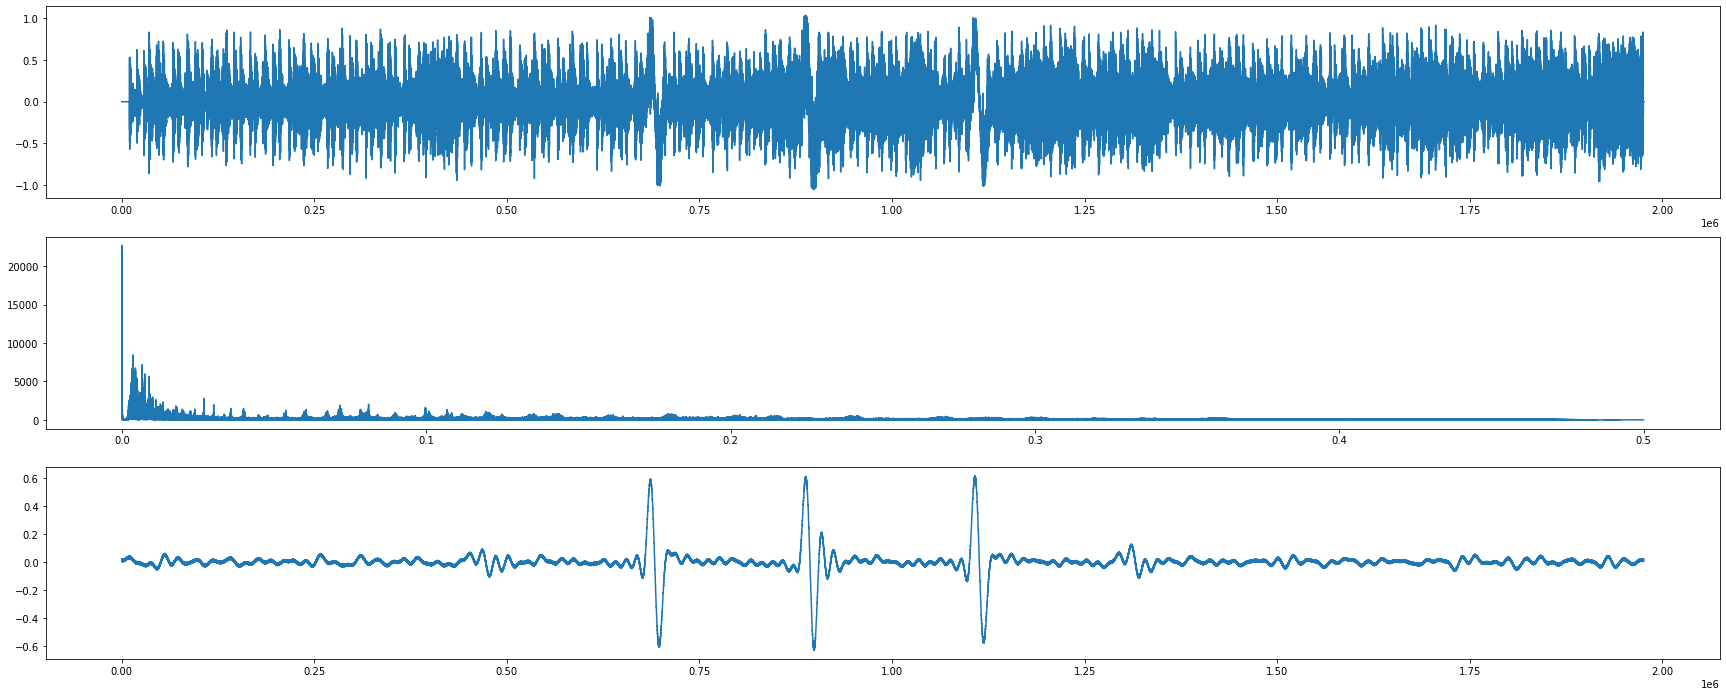

In [ ]:
isolated=transform_and_compare(1,data5,data1)

In [ ]:
ffit=isolated[0]
t=isolated[1]
q1, q3= np.percentile(ffit,[25,75], interpolation = 'midpoint')
iqr = q3 - q1
upper_bound = q3 +(1.5 * iqr)
counter=0
for item in ffit:
  if item> upper_bound:
    counter+=1
ffit1=ffit>upper_bound

is_signal=ffit>0.59

In [ ]:
from scipy.signal import find_peaks

In [ ]:
peaks, properties = find_peaks(ffit, prominence=0.6, width=20)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [ ]:
peaks

array([ 686360,  887905, 1107518])

In [ ]:
import plotly.graph_objects as go

import numpy as np
import pandas as pd
import scipy

from scipy import signal

np.random.seed(1)

x = np.linspace(0, 10, 100)
y = np.sin(x)
noise = 2 * np.random.random(len(x)) - 1 # uniformly distributed between -1 and 1
y_noise = y + noise

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(size=2, color='black'),
    name='Sine'
))

fig.add_trace(go.Scatter(
    x=x,
    y=y_noise,
    mode='markers',
    marker=dict(
        size=6,
        color='royalblue',
        symbol='circle-open'
    ),
    name='Noisy Sine'
))

fig.add_trace(go.Scatter(
    x=x,
    y=signal.savgol_filter(y,
                           53, # window size used for filtering
                           3), # order of fitted polynomial
    mode='markers',
    marker=dict(
        size=6,
        color='mediumpurple',
        symbol='triangle-up'
    ),
    name='Savitzky-Golay'
))


fig.show()

In [ ]:
ffitsort=sorted(ffit)

In [ ]:
counter/len(ffit)

0.0394638807904114

In [ ]:
plot=ffit==max(ffit)
sum(plot)

1

In [ ]:

import pandas as pd
df=pd.DataFrame(plot)
df.to_csv("plot.csv")


KeyboardInterrupt: ignored

In [ ]:
has_value=has_value.tolist()

In [ ]:
indices=[i for i, x in enumerate(plot) if x]

In [ ]:
max(ffit)

(0.8694331681965269+4.931011744962758e-17j)

In [ ]:
is_max=ffit>=max(ffit)-std
    

In [ ]:
trues=sum(is_max)
trues

38

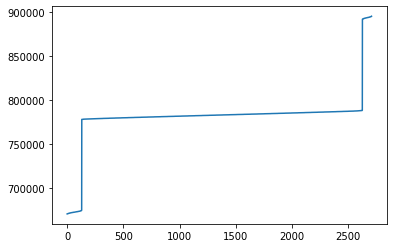

In [ ]:
plt.plot(indices)

In [ ]:
dct = dict((y, x) for x, y in isolated)
print(dct)

In [ ]:
print(len(set(dct)))
print(len(dct))

1975680
1975680


In [ ]:
flipped = {}
  
for key, value in dct.items():
    if value not in flipped:
        flipped[value] = key
    else:
        flipped[value].append(key, value)

In [ ]:
repeat = {}
newdct=dct
for key, value in dct.items():
    if value not in flipped:
      del newdict[key]
        

{(0.34024341261598534-1.8413805915389703e-18j): 0,
 (0.33930977601052537+1.611208017596599e-18j): 1,
 (0.33456996419830765-2.301725739423713e-18j): 2,
 (0.3261871819001116-4.603451478847426e-19j): 3,
 (0.3144334803422694-3.222416035193198e-18j): 4,
 (0.2996739809607055+1.8413805915389703e-18j): 5,
 (0.28234594035181804-9.206902957694851e-19j): 6,
 (0.2629340041704375-1.611208017596599e-18j): 7,
 (0.24194324031654468+3.222416035193198e-18j): 8,
 (0.21987168058582238+4.833624052789797e-18j): 9,
 (0.1971841259506032-4.603451478847426e-19j): 10,
 (0.17428888213193075+2.301725739423713e-18j): 11,
 (0.15151889495124635+3.222416035193198e-18j): 12,
 (0.12911846204738095+4.143106330962683e-18j): 13,
 (0.10723632810522853+4.603451478847426e-19j): 14,
 (0.08592554896369954+0j): 15,
 (0.0651500634692901-4.603451478847426e-18j): 16,
 (0.04479746994838388+5.5241417746169105e-18j): 17,
 (0.0246970956183091-5.5241417746169105e-18j): 18,
 (0.004642098885373615+1.8413805915389703e-18j): 19,
 (-0.015585

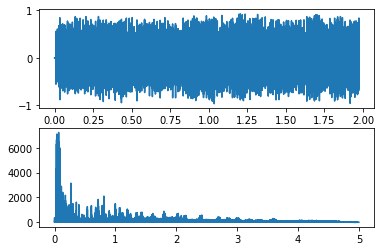

7240.345649323176

In [ ]:
maxPSDNormal=transform_and_plot(0.1,data1)
maxPSDNormal

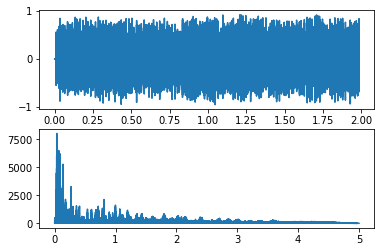

8021.657765167709

In [ ]:
maxPSDadded=transform_and_plot(0.1,data2)
maxPSDadded

In [ ]:
indices=PSD

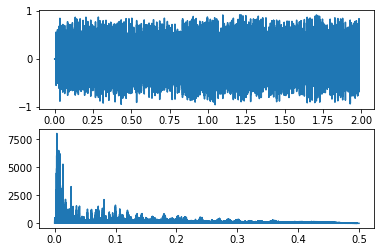

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


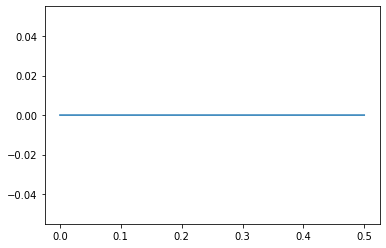

In [ ]:
#filter out all but square wave?

 #incriment of x axis, try 0.001, 0.1 or 1
n=len(data2)
fhat=np.fft.fft(data2,n)
PSD = fhat+np.conj(fhat)/n
freq=(1/(dt*n)) *np.arange(n)
L=np.arange(1,np.floor(n/2),dtype="int")

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(data2)
#plt.xlim(data[0],data[-1])


plt.sca(axs[1])
plt.plot(freq[L], abs(PSD[L]))
#plt.xlim(freq[L[0]],freq[L[-1]])
plt.show()

maxPSD=max(abs(PSD[L]))
indices = PSD > maxPSDNormal
PSDclean=PSD * indices
fhat=indices*fhat
ffit = np.fft.ifft(fhat)

plt.plot(freq[L],PSDclean[L])
plt.show

In [ ]:
squaredata=data
index=[]
for i in range (len(squaredata)):
    if i>len(squaredata/7) and i<len(squaredata/6):
        index.append(2)
    else:
        index.append(0)

donedata=squaredata+index

In [ ]:
len(data)

8807064

8807064

No handles with labels found to put in legend.
No handles with labels found to put in legend.


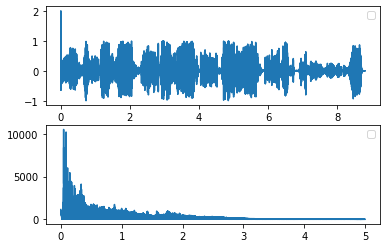

In [ ]:
#transformed music
dt=0.1  #incriment of x axis
n=len(data)
fhat=np.fft.fft(donedata,n)
PSD = fhat+np.conj(fhat)/n
freq=(1/(dt*n)) *np.arange(n)
L=np.arange(1,np.floor(n/2),dtype="int")

fig,axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(donedata)
#plt.xlim(data[0],data[-1])
plt.legend()


plt.sca(axs[1])
plt.plot(freq[L], abs(PSD[L]))
#plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.show()

In [ ]:
def plot_m_s(signal, title, sr):
    ft = np.fft.fft(signal)
    mag_spectrum=np.abs(ft)

    #plot mag spectrum

    frequency = np.linspace(0,sr,len(mag_spectrum))
    plt.plot(frequency, mag_spectrum)
    plt.xlabel("Frequency in Hz")
    plt.title(title)
    plt.show()

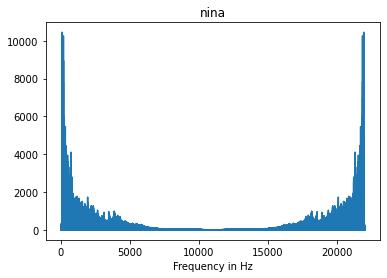

In [ ]:
plot_m_s(data,"nina",sr)